# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
# data wrangling and EDA
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Model building
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import warnings

# Model evaluation
from yellowbrick.cluster import SilhouetteVisualizer
from kneed.knee_locator import KneeLocator
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

warnings.filterwarnings("ignore")

sb.set_theme()

In [3]:
wholesale_data = pd.read_csv('Wholesale_Data.csv')
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
wholesale_data.shape

(440, 8)

In [5]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
wholesale_data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
wholesale_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# Checking for unique values in each of the columns

wholesale_data.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [10]:
columns_of_interest = ['Channel', 'Region']

wholesale_data[columns_of_interest].value_counts()

Channel  Region
1        3         211
2        3         105
1        1          59
         2          28
2        2          19
         1          18
Name: count, dtype: int64

Channel and Region are both categorical variables. Unfortunately, there is no background information on what they are both representing.

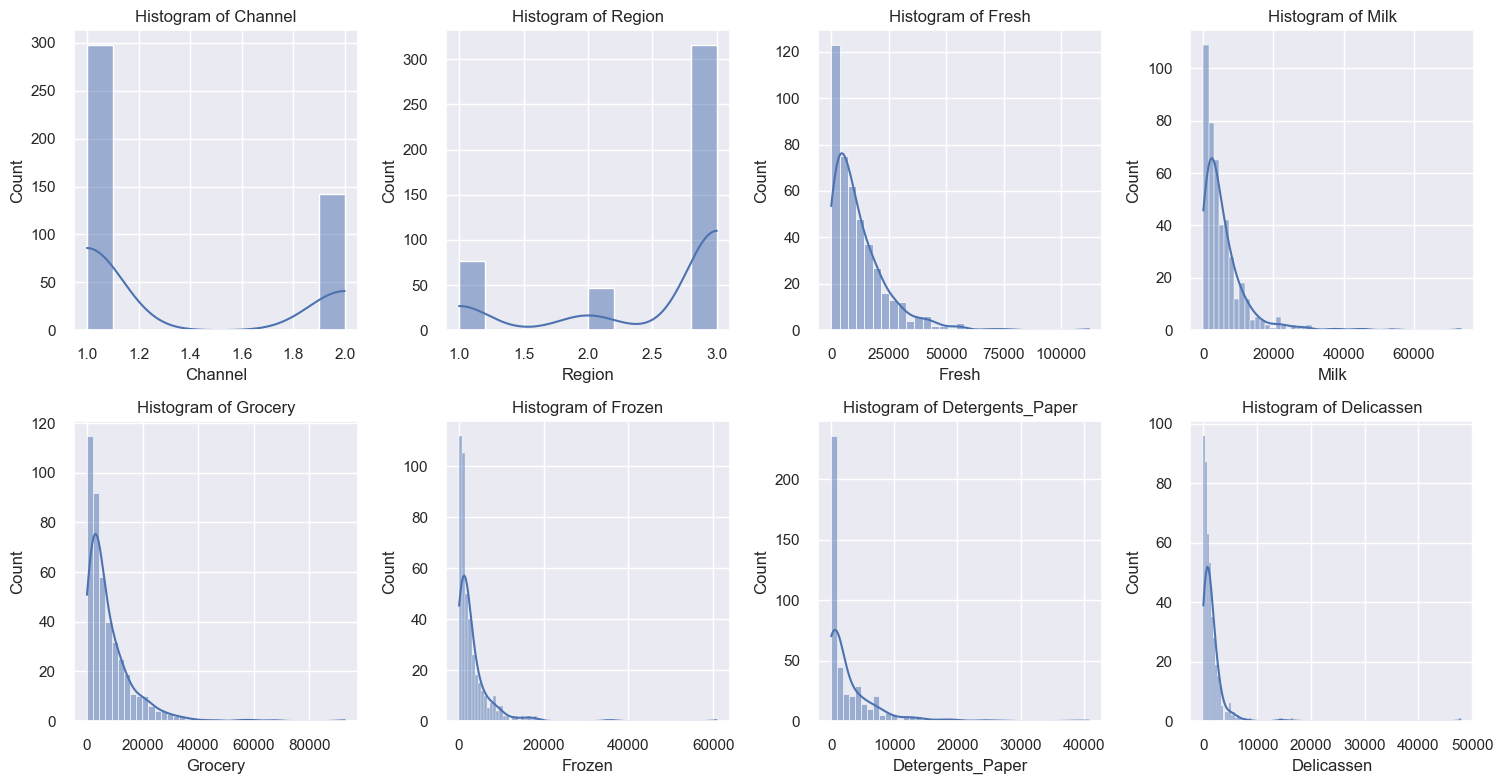

In [10]:
# Histogram distribution of dataset.

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

axes = axes.flatten()

for i, column in enumerate(wholesale_data.columns):
    ax = axes[i]
    sb.histplot(wholesale_data[column], ax=ax, kde=True)
    ax.set_title('Histogram of '+ column)

plt.tight_layout()

The distribution of numerical features is right-skewed.

In [11]:
numerical_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
categorical_features = ['Channel', 'Region']

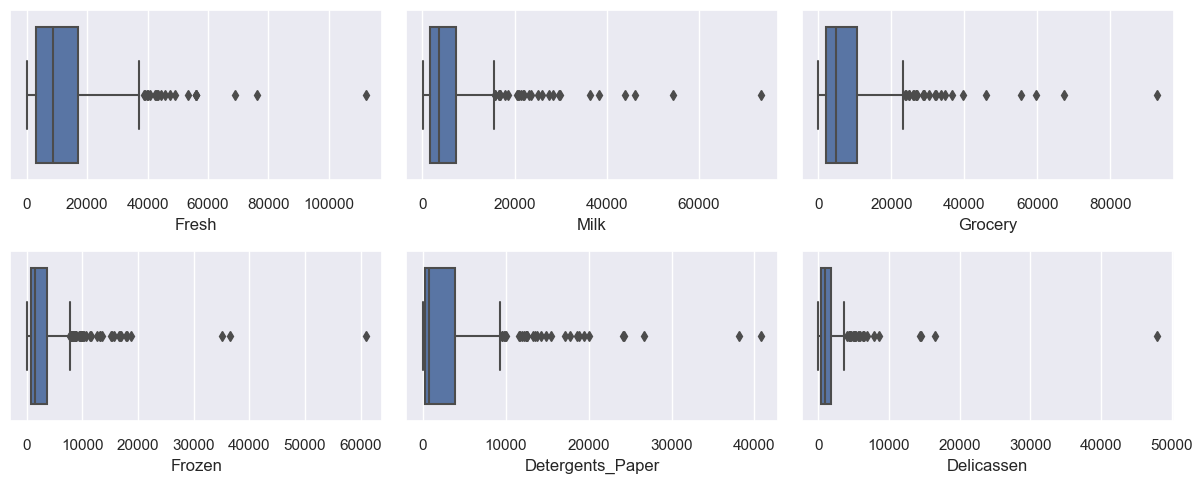

In [11]:
# Visualizing the distribution of the numerical features using Box plots

fig, axes = plt.subplots(2, 3, figsize=(12, 5))

axes = axes.flatten()
    
for i, column in enumerate(wholesale_data[numerical_features].columns):
    plt.sca(axes[i])
    sb.boxplot(x=column, data=wholesale_data[numerical_features])
    
plt.tight_layout()

There are several outliers in the numerical features. The dataset is too small to remove outliers completely. I will rather clip the outliers using quartiles.

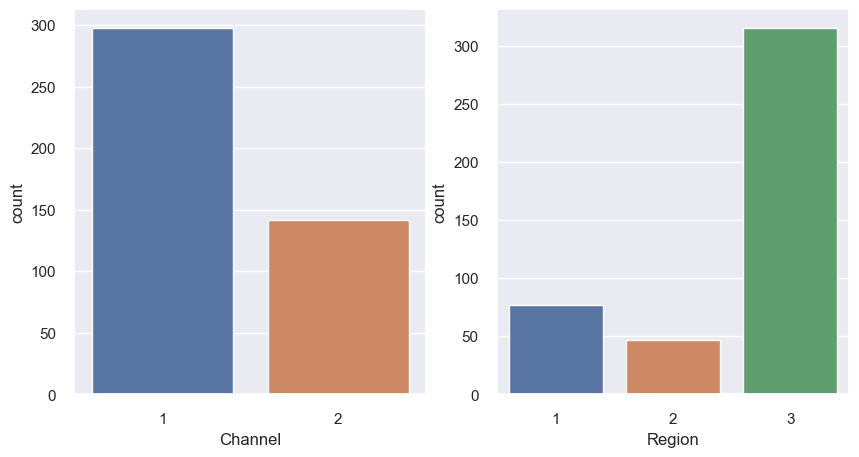

In [79]:
# Visualizing the distribution of the categorical features using Count plots

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes = axes.flatten()
    
for i, column in enumerate(wholesale_data[categorical_features].columns):
    plt.sca(axes[i])
    sb.countplot(x=column, data=wholesale_data)

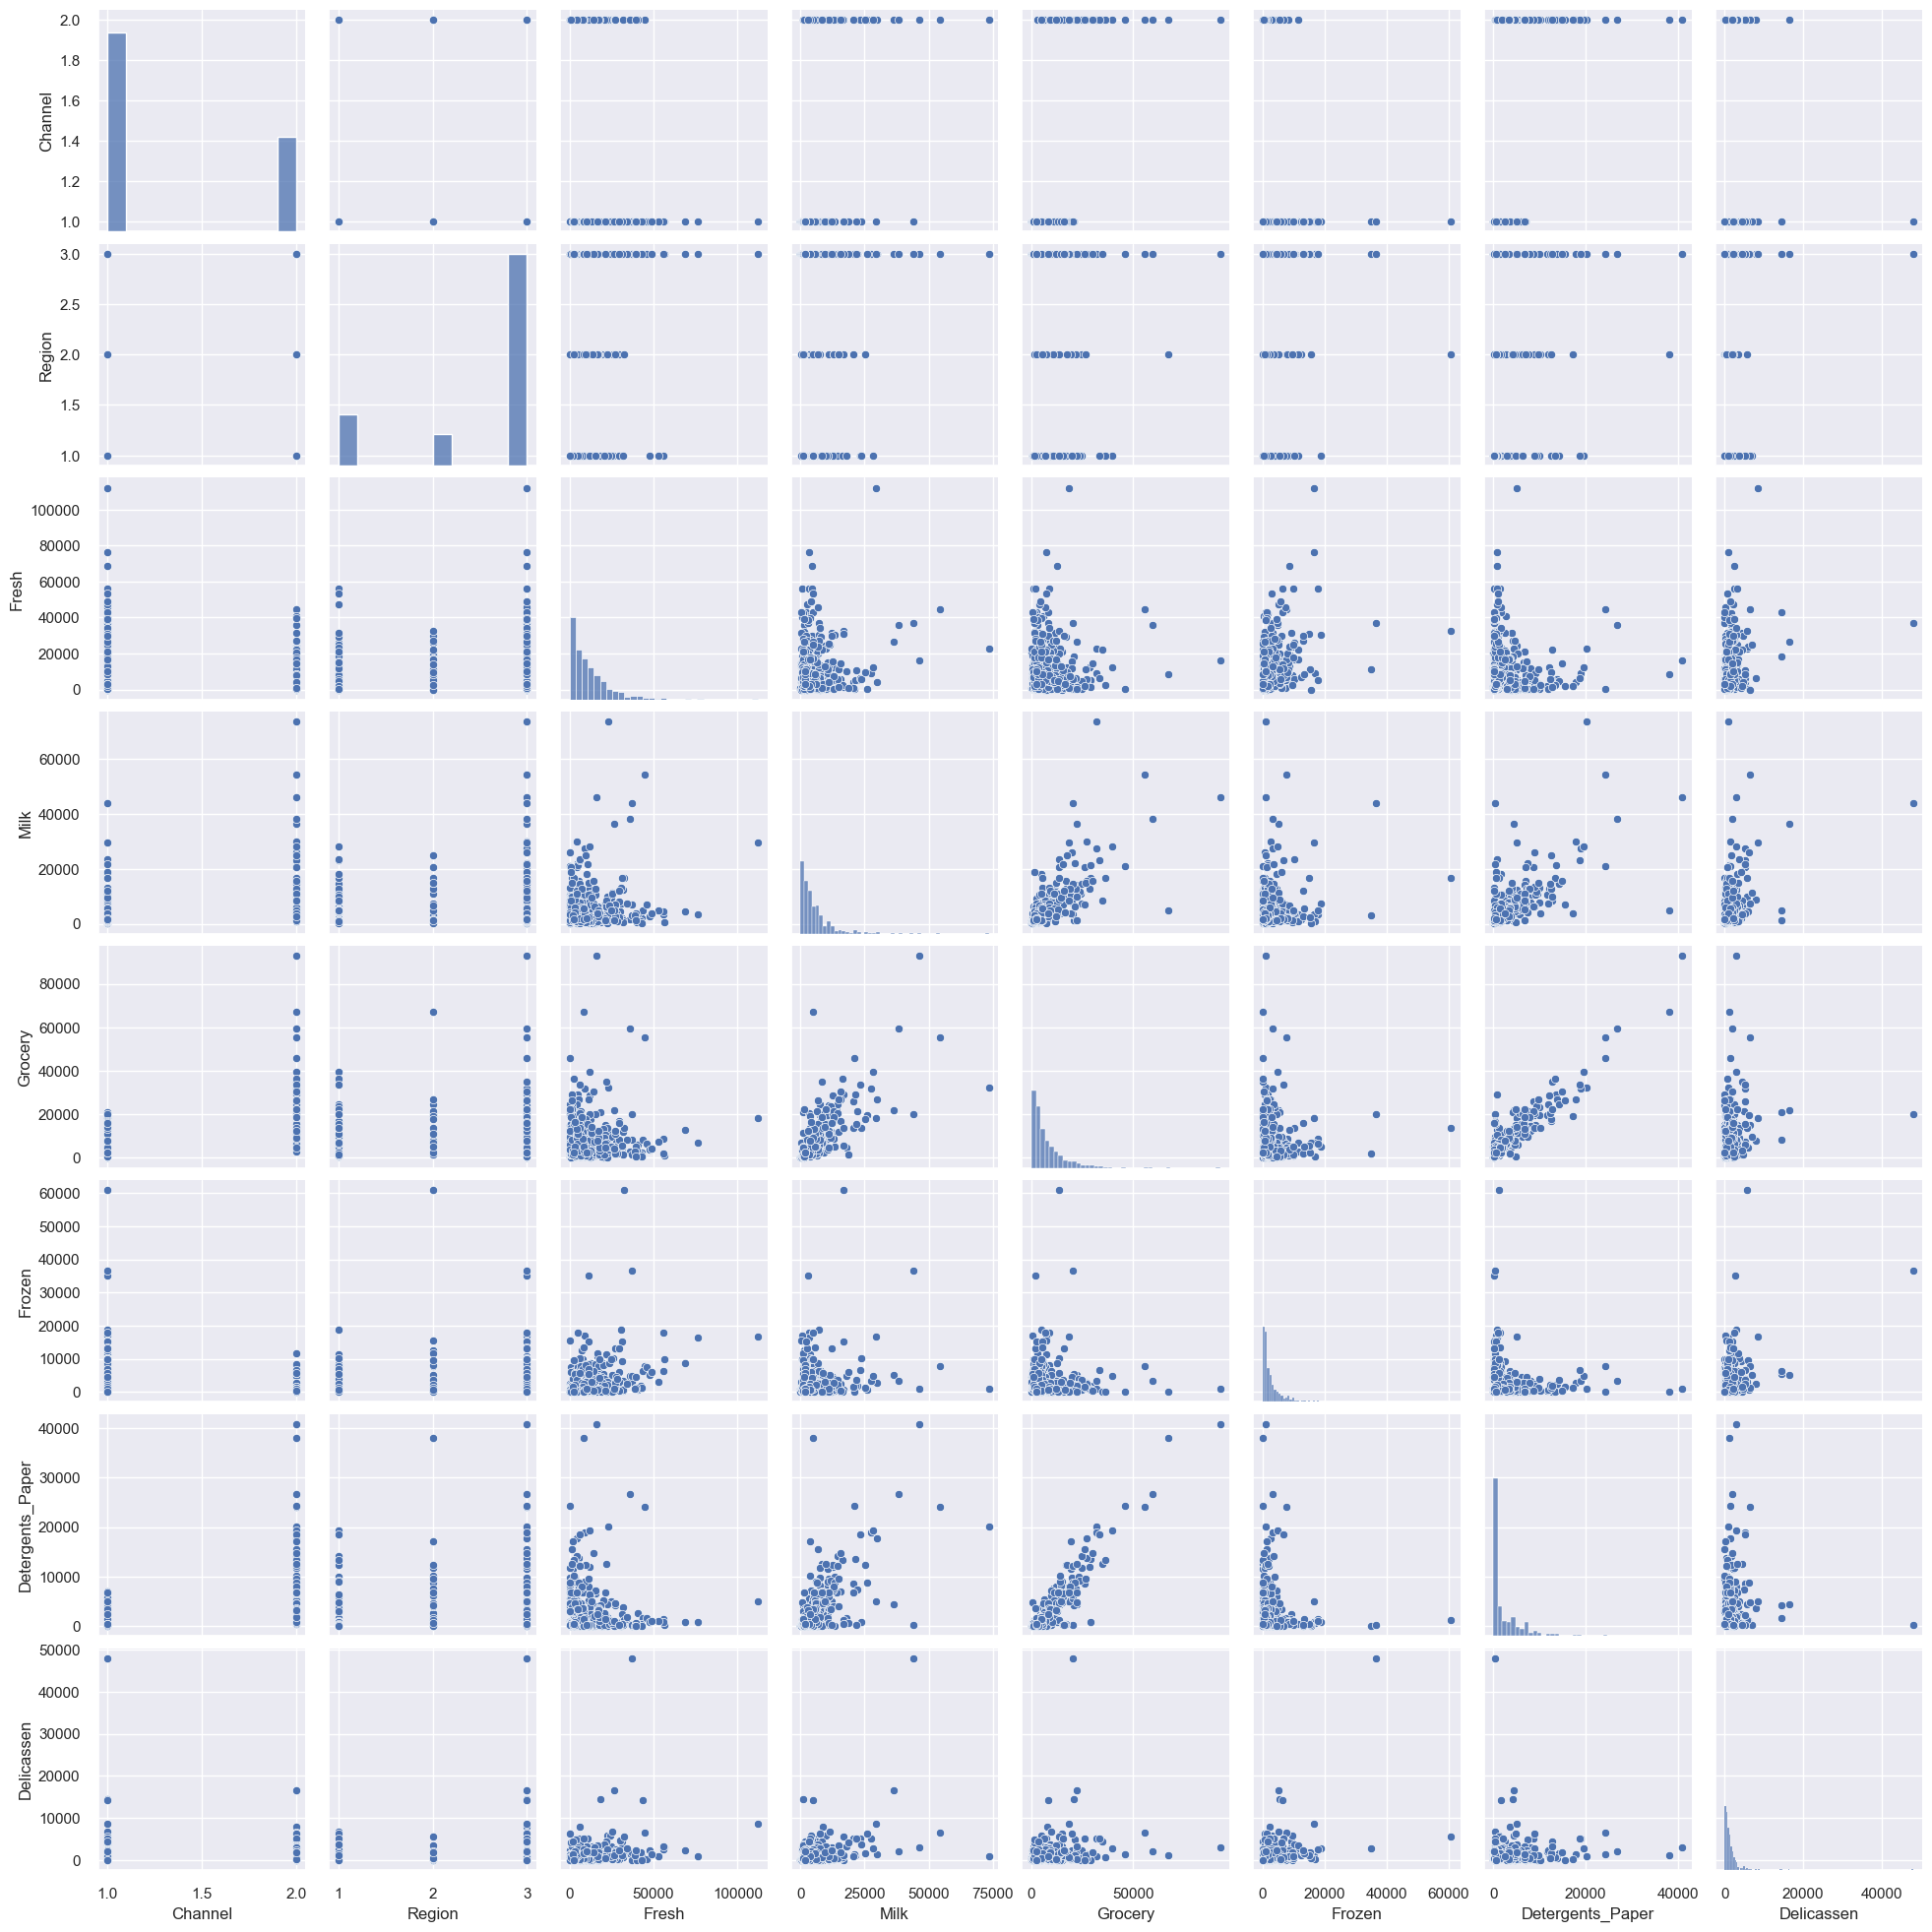

In [14]:
# Visualizing the correlation between features in an attempt to find relevant independent variables

sb.pairplot(wholesale_data)

In [13]:
# Numerical correlation values between features

wholesale_data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


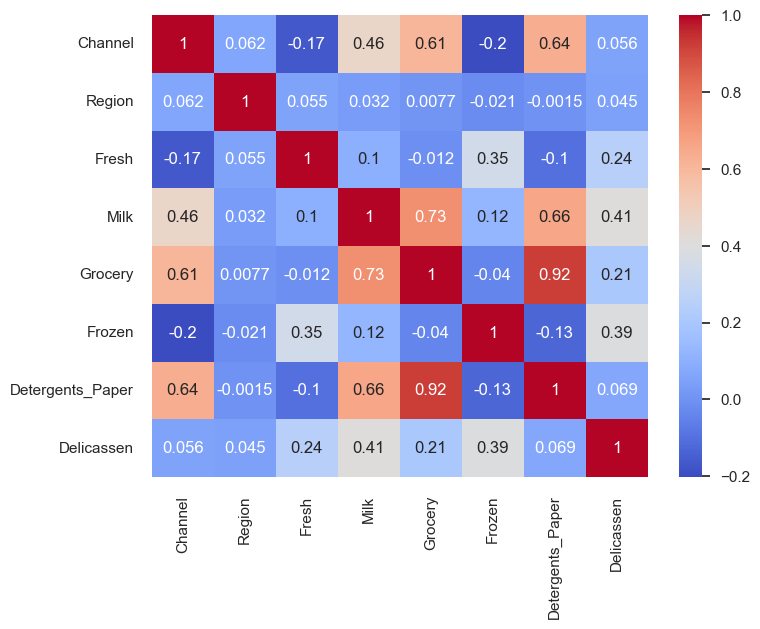

In [14]:
# Heatmap for correlation between the features

# Setting figure size
sb.set(rc={"figure.figsize":(8, 6)})

sb.heatmap(wholesale_data.corr(), 
           annot=True, 
           cmap='coolwarm')
plt.show()

The numerical correlation table and heatmap informs us that there is positive correlation between Detergents_Paper and Channel, Milk, and a strong positive correlation with Grocery. Delicassen has positive correlation with Milk, and Frozen and Fresh. Channel is correlated with Grocery and Milk. Fresh is has a positive correlation with Frozen. Milk is positively correlated with Grocery and Delicassen. Frozen is negatively correlated with Channel.Region has almost no correlation with all the other features.

In [12]:
# Clipping approach used in handling the outliers.

# Calculate lower and upper limits for clipping based on the entire dataset using IOR
q3 = wholesale_data.quantile(0.75)
q1 = wholesale_data.quantile(0.25)

upper_limit = q3 + 1.5 * (q3 - q1)
lower_limit = q3 - 1.5 * (q3 - q1)

wholesale_df = wholesale_data.copy()

for column in wholesale_data[numerical_features].columns:
    wholesale_df[column] = np.clip(wholesale_data[column], lower_limit[column], upper_limit[column])
    
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


In [14]:
# The dataset will be normalized and scaled because the distribution is not Gaussian.

def feature_transformation(dataframe):
    """A function that takes a DataFrame and normalizes the function
    after which it will scale the resulting DataFrame.

    Args:
        dataframe: DataFrame to be preprocessed for modeling.
    """
    normalize = MinMaxScaler()
    normalized_data = normalize.fit_transform(dataframe)
    
    # The dataset is now scaled using the StandardScaler.
    scaler = StandardScaler()
    wholesale_df = scaler.fit_transform(normalized_data)
    
    return wholesale_df

In [15]:
# Applying feature transformation to the dataset before finally passing it to the model

wholesale_df = feature_transformation(wholesale_df)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [16]:
# Determing the optimal number of clusters, k

ss_error = []
list_k = list(range(1, 20))

# Fitting and training the model
for k in list_k:
    km = KMeans(n_clusters=k, 
                init='k-means++', 
                max_iter=100, 
                n_init=10, 
                random_state=42)
    km.fit(wholesale_df)
    ss_error.append(km.inertia_)

In [17]:
# DataFrame containing the sum of squared errors for range of number of clusters

clusters_df = pd.DataFrame({"num_clusters":list_k, "cluster_errors": ss_error})
clusters_df.head()

,num_clusters,cluster_errors
0,1,3520.000000
1,2,2313.139973
2,3,1930.376971
3,4,1691.242941
4,5,1495.181045


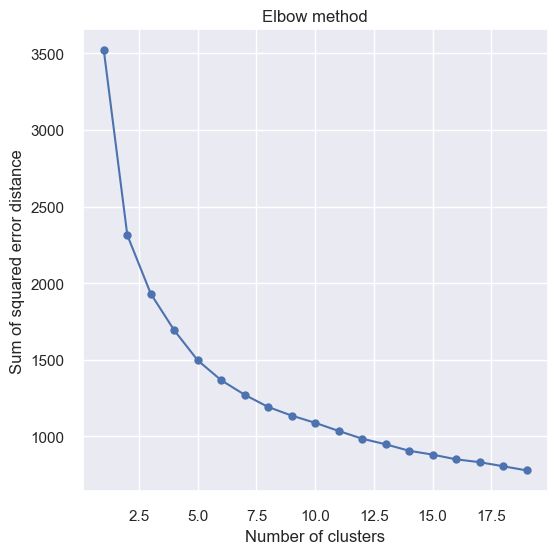

In [18]:
# Plotting sum of squared distance errors against k

plt.figure(figsize=(6, 6))
plt.plot(list_k, ss_error, '-o')
plt.xlabel(f'Number of clusters')
plt.ylabel('Sum of squared error distance')
plt.title('Elbow method');

From the above elbow curve, it is quite difficult to determine the optimal number of clusters, k. The silhoutte scores plot will be introduced to further help. There is a strong possibility that the KMeans algorithm is not an appropriate choice for this problem.

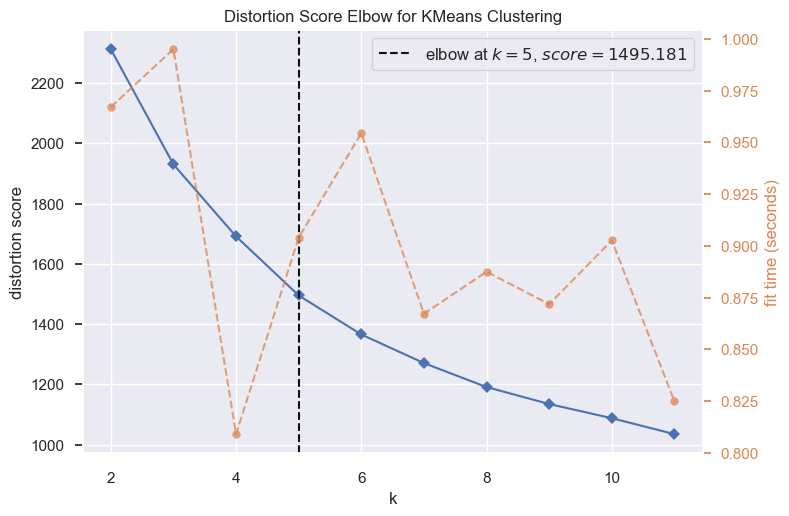

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KMeans(n_clusters=k, 
                init='k-means++', 
                max_iter=100, 
                n_init=10, 
                random_state=42)

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2, 12), timings= True)
visualizer.fit(wholesale_df)        
visualizer.show()                   

In [20]:
# Using the knee locator to determine optimal number of clusters
k1=KneeLocator(range(1,20), ss_error, curve='convex', direction='decreasing')
k1.elbow

5

It is quite difficult to be confident in the results so far, as it seems that the sum of squared errors is yet to converge. Hence, I will be using the silhoutte scores to determine the final number of clusters, k.

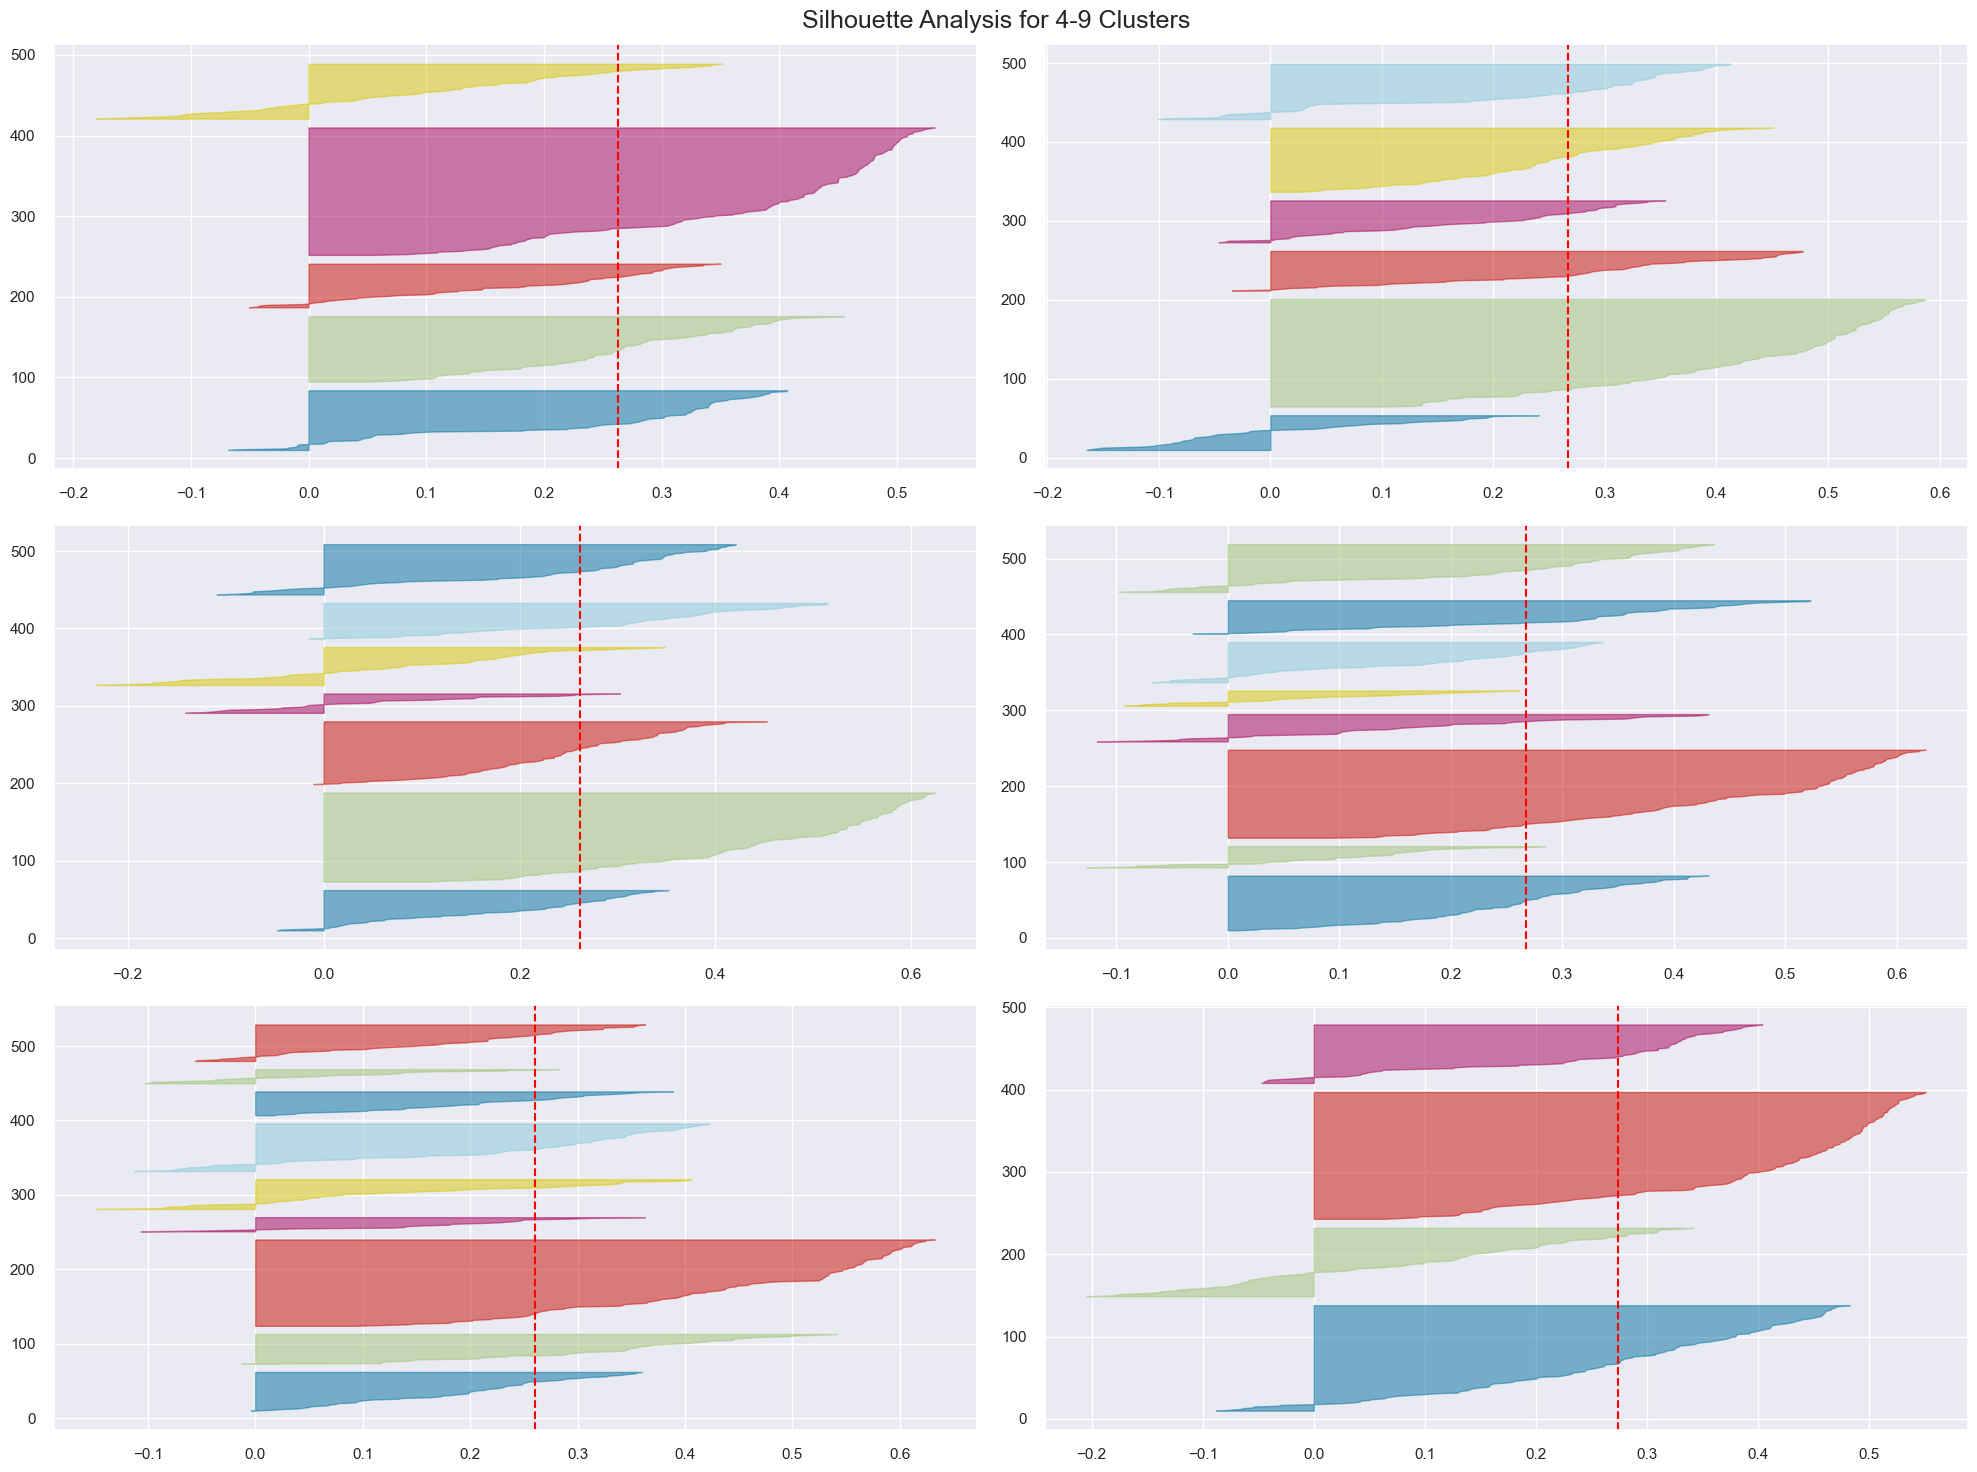

In [21]:
# Plotting the Silhoutte scores for different cluster sizes

fig, ax = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle('Silhouette Analysis for 4-9 Clusters', size = 18)
plt.tight_layout()

for i in [4,5,6,7,8,9]:
    
    # Fitting the Kmeans algorithm with different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-3, 2)

    # Fitting the silhoutte visualier to the kmeans model
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(wholesale_df)

plt.show()

The additional plots shows that it is quite difficult to pick an appropraite number of clusters for the K-Means algorithm. Furthermore, negative silhoutte scores shows that K-Means is not really appropriate for solving this clustering problem.

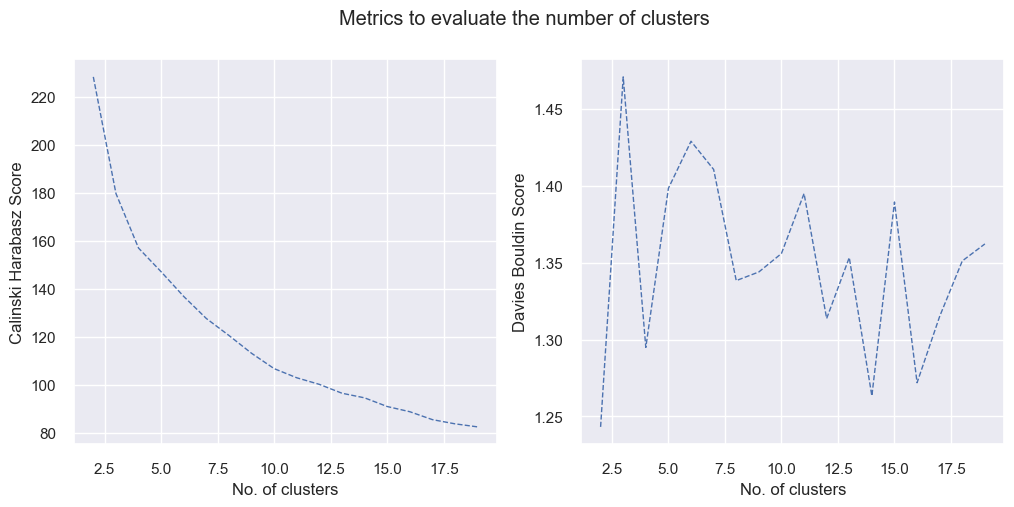

<Figure size 800x600 with 0 Axes>

In [75]:
# Further plots in trying to find an optimal number of clusters

min_val, max_val = 2, 20

ch_score = []
db_score = []

for n_clust in range(min_val, max_val):
    kmeans = KMeans(n_clusters=n_clust, random_state=42)
    y_pred = kmeans.fit_predict(wholesale_df)
    ch_score.append(calinski_harabasz_score(wholesale_df, y_pred))
    db_score.append(davies_bouldin_score(wholesale_df, y_pred))        

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(range(min_val, max_val), ch_score, linestyle='--', linewidth=1)
ax[0].set_xlabel('No. of clusters')
ax[0].set_ylabel('Calinski Harabasz Score')

ax[1].plot(range(min_val, max_val), db_score, linestyle='--', linewidth=1)
ax[1].set_xlabel('No. of clusters')
ax[1].set_ylabel('Davies Bouldin Score')
fig.suptitle('Metrics to evaluate the number of clusters')
plt.show()
plt.tight_layout()

Deciding on the optimal number of clusters is a herculean task, as could be observed from all the previous plots and metrics. However, I will make an attempt at using 5 clusters for the model

In [23]:
# Training the KMeans model using number of clusters, k = 5

model = KMeans(n_clusters=5, 
                init='k-means++', 
                max_iter=100, 
                n_init=10, 
                random_state=42)

y_kMeans = model.fit_predict(wholesale_df)

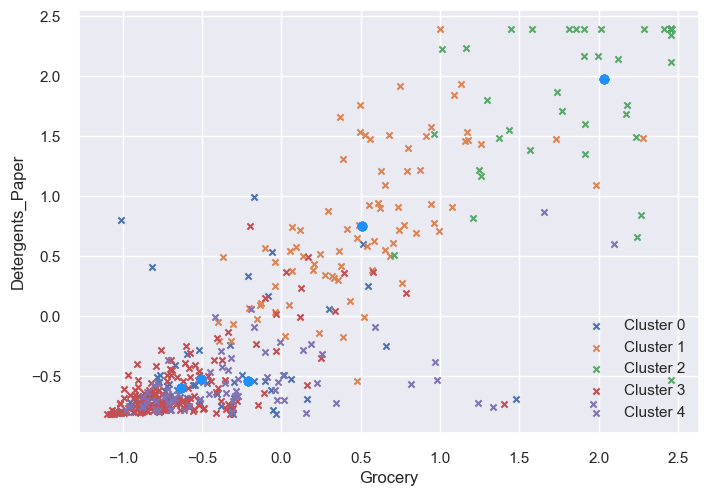

In [24]:
# Visualizing the results

for i in np.unique(y_kMeans):
    plt.scatter(wholesale_df[y_kMeans==i, 4], wholesale_df[y_kMeans==i, 6], s=20, marker='x', label=f'Cluster {i}')
    plt.scatter(model.cluster_centers_[:,4], model.cluster_centers_[:,6], color = 'dodgerblue')

plt.legend(loc='lower right')
plt.xlabel("Grocery")
plt.ylabel("Detergents_Paper")
plt.show()

There is no definite clusters or segmentation so far. Probably, after PCA or some other dimensionality reduction technique is used to reduce the number of dimensions, it will be eaiser to visualize the segmentations and clusters.

In [25]:
# Calculating the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.

print(f'The Davies Bouldin score for 5 clusters is {davies_bouldin_score(wholesale_df, y_kMeans)}')
print(f'The Calinski Harabasz score for 5 clusters is {calinski_harabasz_score(wholesale_df, y_kMeans)}')

The Davies Bouldin score for 5 clusters is 1.3985403629964264
The Calinski Harabasz score for 5 clusters is 147.2725073613262


The Davies Bouldin score seems to show that the size of clusters against the average distance between clusters is good. This means the predictions from the KMeans algorithm can be worked with. The variance ratio criterion (Calinski Harabasz score) shows that the between-cluster dispersion against within-cluster dispersion can also be worked with (as it is high)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [26]:
# Defining the function to plot a dendrogram

def plot_dendrogram(DataFrame, method =['ward', 'average', 'complete']):
    """Function to plot dendogram based on different methods,
    to help identify the optimal number of clusters

    Args:
        DataFrame: dataframe to be used for clustering
        method: Graphs of different methods to be plotted.
    """
    for mthd in method:
        
        plt.figure(figsize=(10,5))
        
        dendrogram = sch.dendrogram(sch.linkage(DataFrame, method=mthd))
        plt.title("Dendrogram")
        plt.ylabel(f"Euclidean distances ({mthd})")
        plt.xlabel('Points')
        plt.show()

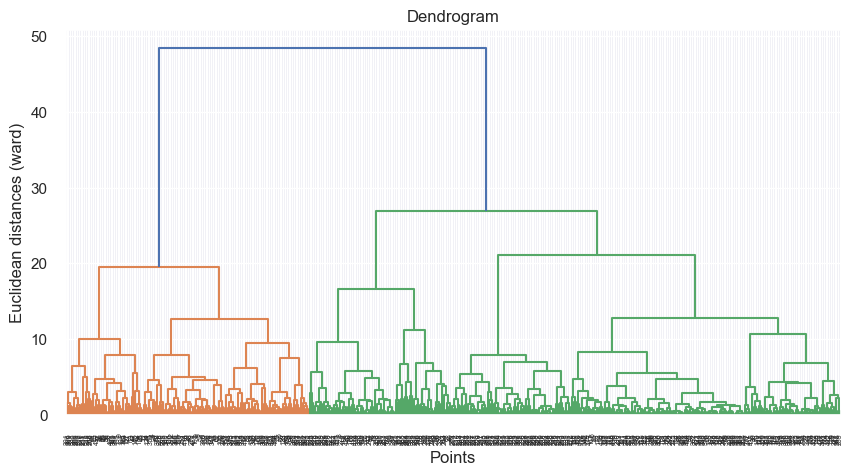

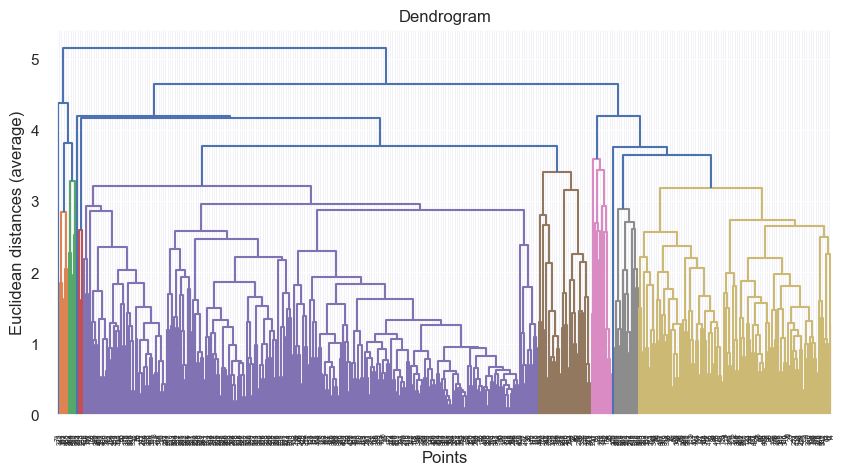

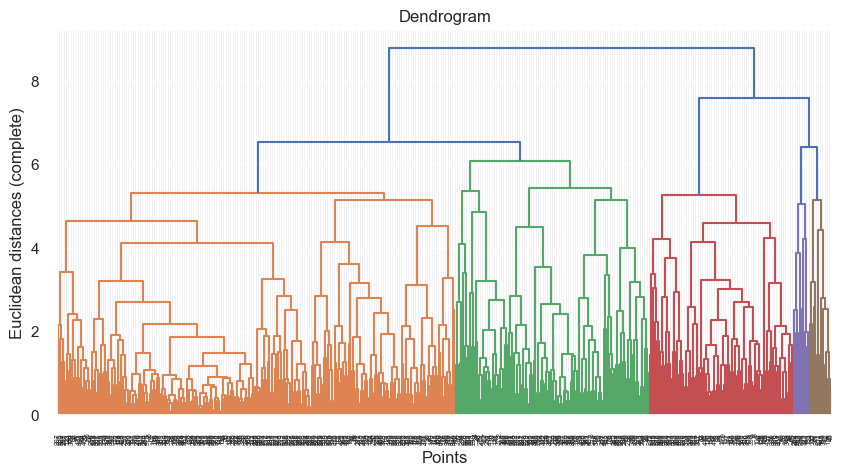

In [27]:
plot_dendrogram(wholesale_df)

Again, determining the optimal number of clusters presents a daunting challenge. I will go ahead to try out 5 clusters and observe what kind of results I'll obtain.

In [28]:
# Defining the Hierarchical clustering model

agg_cluster = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 5)

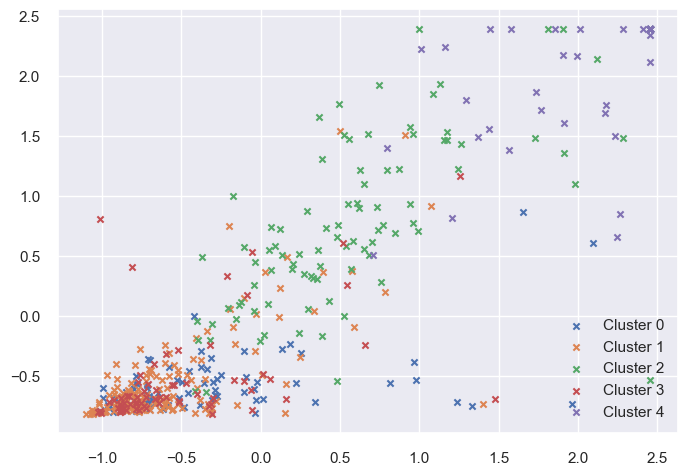

In [29]:
y_aggCluster = agg_cluster.fit_predict(wholesale_df)

# Visualizing the results

for i in np.unique(y_aggCluster):
    plt.scatter(wholesale_df[y_aggCluster==i, 4], wholesale_df[y_aggCluster==i, 6], s=20, marker='x', label=f'Cluster {i}')

plt.legend(loc='lower right')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [62]:
# Attempting to discover the optimal number of clusters, k

pca = PCA(n_components=None)
y_pca = pca.fit_transform(wholesale_df)

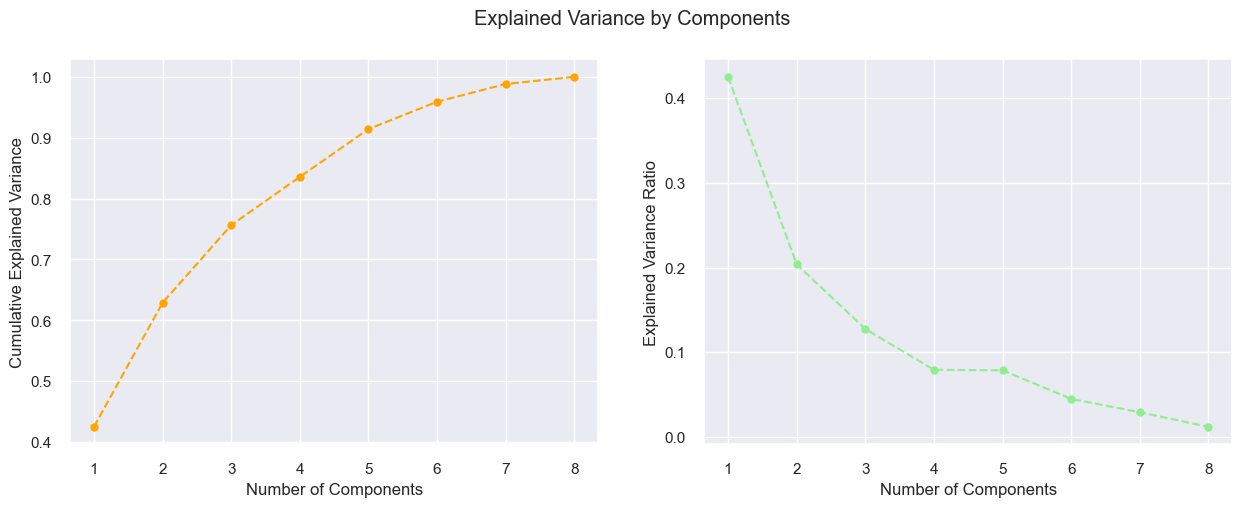

<Figure size 800x600 with 0 Axes>

In [63]:
# Plotting the explained variance ratio for cumulative sum and individual values

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(range(1,9), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='orange')
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Cumulative Explained Variance')

ax[1].plot(range(1,9), pca.explained_variance_ratio_, marker='o', linestyle='--', color='lightgreen')
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Explained Variance Ratio')
fig.suptitle('Explained Variance by Components')
plt.show()
plt.tight_layout()

The rule of thumb for selecting number of clusters for PCA is that the clusters must explain between 70% and 80% of the variance. In the following code block, the number of clusters is selected as 4. Although 3 has a cumulative explained variance between 70% and 80% (from the first figure), I prefer to try 4.

In [64]:
# Training the PCA model using the dataset

pca = PCA(n_components=4)
y_pca = pca.fit_transform(wholesale_df)

In [65]:
# Creating a dataframe of the principal components and the entire wholesale dataset

pca_comp_data = pd.DataFrame(data=pca.components_,
                             columns=wholesale_data.columns,
                             index=['Component 1', 
                                    'Component 2', 
                                    'Component 3', 
                                    'Component 4'])
pca_comp_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Component 1,0.466774,0.016736,-0.109875,0.457293,0.506549,-0.135453,0.505674,0.173225
Component 2,-0.078981,0.014665,0.573080,0.184316,0.070711,0.564174,-0.077652,0.549392
Component 3,-0.065205,-0.974882,-0.143385,0.043307,0.032724,0.145216,0.027487,0.002236
Component 4,-0.139354,0.191837,-0.795202,0.068977,-0.052802,0.437017,-0.056393,0.331244


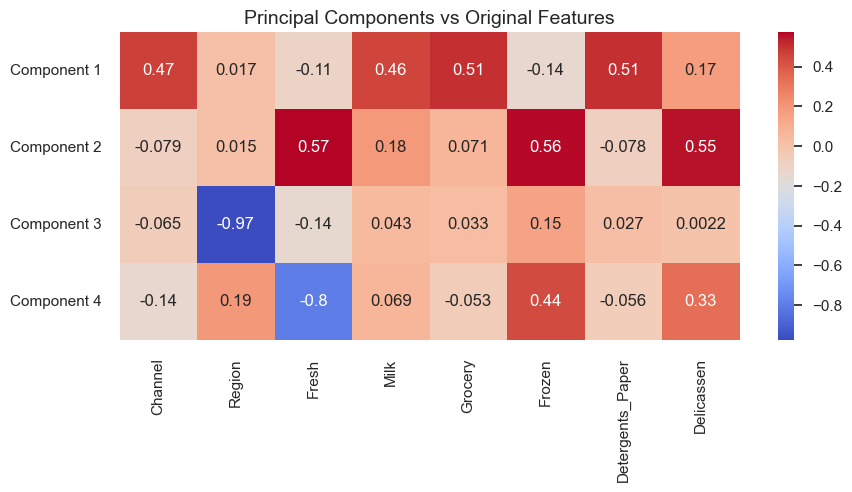

In [66]:
# Plotting the correlation map between principal components and wholesale dataset

plt.figure(figsize=(10, 4))
sb.heatmap(pca_comp_data,
            annot = True,
            cmap='coolwarm')
plt.title('Principal Components vs Original Features',fontsize = 14)
plt.show()

Component 1 has a positive correlation with Channel, Milk, Grocery and Detergents_Paper. Component 2 has a positive correlation with Fresh, Frozen and Delicassen. Component 3 has a negative correlation with Region. Component 4 has a positive correlation with Frozen and Delicassen. But has a negative relationship with Fresh.

In [67]:
# Creating a dataframe that will be used to plot the clusters for KMeans algorithm.

pca_df = pd.DataFrame(y_pca, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4'])

pca_df['Clusters'] = model.labels_
pca_df.head()

,pca_1,pca_2,pca_3,pca_4,Clusters
0,1.366764,-0.343797,-0.777218,-0.521031,1
1,1.687111,-0.061971,-0.586693,0.306281,1
2,1.793681,1.079071,-0.550685,1.135071,1
3,-1.427355,1.204432,-0.392013,0.928075,4
4,0.842098,2.244694,-0.740407,0.125367,4


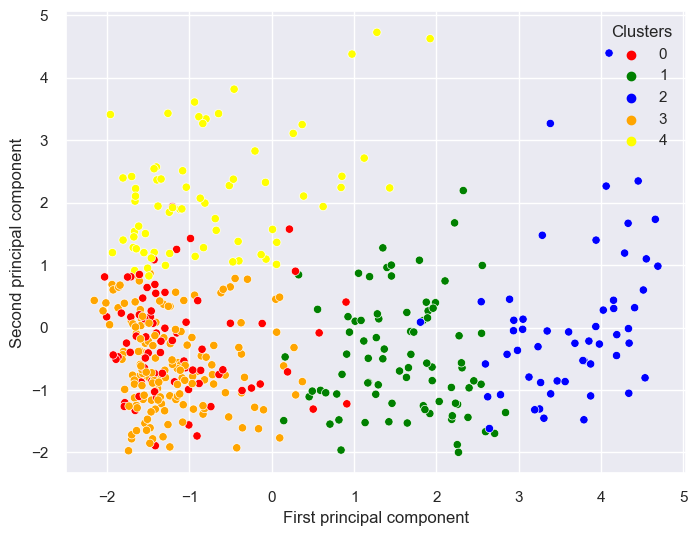

In [68]:
# Visualizing the KMeans clusters in 2D plane

ax = sb.scatterplot(x="pca_1", 
                    y="pca_2", 
                    hue="Clusters", 
                    data=pca_df, 
                    palette=['red','green','blue', 'orange', 'yellow'])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [69]:
# Creating a dataframe that will be used to plot the clusters for Hierarchical Clustering algorithm.

pca_agg_df = pd.DataFrame(y_pca, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4'])

pca_agg_df['Agg_Clusters'] = y_aggCluster
pca_agg_df.head()

,pca_1,pca_2,pca_3,pca_4,Agg_Clusters
0,1.366764,-0.343797,-0.777218,-0.521031,2
1,1.687111,-0.061971,-0.586693,0.306281,2
2,1.793681,1.079071,-0.550685,1.135071,2
3,-1.427355,1.204432,-0.392013,0.928075,0
4,0.842098,2.244694,-0.740407,0.125367,2


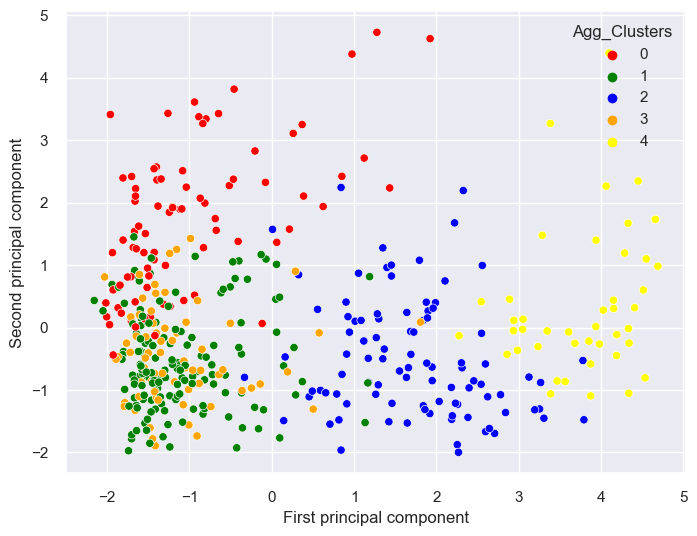

In [72]:
# Visualizing the Agglomerative clusters in 2D plane

ax = sb.scatterplot(x="pca_1", 
                    y="pca_2", 
                    hue="Agg_Clusters", 
                    data=pca_agg_df, 
                    palette=['red','green','blue', 'orange', 'yellow'])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

### The PCA algorithm was used to visualize the results obtained using the KMeans and the Hierarchical algorithms (in lower dimensions).
It is not so easy to tell which model did best from both algorithms. But I will say the KMeans algorithm did a better job.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [99]:
# Creating a final dataframe for segmentation

kmeans_df = wholesale_data.copy()
kmeans_df['KMeans_Clusters'] = y_kMeans

# Compute and print the silhouette score for the KMeans clustering
kmeans_silhouette_score = silhouette_score(wholesale_df, kmeans_df['KMeans_Clusters'])
print(f'KMeans clustering Silhouette Score: {kmeans_silhouette_score}')

# Grouping the data by cluster and calculating the mean of the original features
kmeans_clusters = kmeans_df.groupby('KMeans_Clusters').mean().astype(int)

# Renaming the clusters into comprehensible names.
kmeans_clusters = kmeans_clusters.rename({0:'Category 1', 
                                1:'Category 2',
                                2:'Category 3', 
                                3:'Category 4', 
                                4:'Category 5'})
kmeans_clusters

KMeans clustering Silhouette Score: 0.2625684890310741


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
KMeans_Clusters,,,,,,,,
Category 1,1,1,11196,2673,3902,2917,865,875
Category 2,1,2,8845,6901,10575,1196,4609,1385
Category 3,1,2,7469,17342,26362,1754,12097,2253
Category 4,1,2,8910,2447,3048,1916,646,818
Category 5,1,2,27355,6390,5856,9181,823,3443


In [76]:
# Creating a final dataframe for segmentation

agg_df = wholesale_data.copy()
agg_df['Agg_Clusters'] = agg_cluster.labels_

# Compute and print the silhouette score for the Agglomerative Clustering
agg_silhouette_score = silhouette_score(wholesale_df, agg_df['Agg_Clusters'])
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette_score}')

# Grouping the data by cluster and calculating the mean of the original features
agg_clusters = agg_df.groupby('Agg_Clusters').mean().astype(int)

# Renaming the clusters into comprehensible names.
agg_clusters = agg_clusters.rename({0:'Category 1', 
                                1:'Category 2',
                                2:'Category 3', 
                                3:'Category 4', 
                                4:'Category 5'})
agg_clusters

Agglomerative Clustering Silhouette Score: 0.23731077351587435


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Agg_Clusters,,,,,,,,
Category 1,1,2,21385,5418,5013,9789,697,2811
Category 2,1,3,10157,2728,3469,1498,802,917
Category 3,2,2,8721,6985,12011,1199,5254,1356
Category 4,1,1,11471,2749,3914,1887,869,904
Category 5,2,2,8955,19325,26510,2007,12169,2586


# Final findings

- The numerical features were right skewed. There are two categorical features disguising as numerical features. Most of the numerical features are positively correlated.
- It was difficult to find an optimal number of clusters for the KMeans algorithm, despite exploring several means of model evaluation. The same problem was encountered for the Hierarchical clustering model. Five cluster was decided on and used for analysis and model training.
- Five categories (clusters) were identified for both algorithms. It is not so easy to properly interpret the results as there is no sufficient background on what Channel, Region represents. But the preliminary analysis is as follows:
    - Hierarchical clustering algorithm; Category 1 spends the most on Fresh, then Frozen, followed by both Milk and Grocery. For the KMeans algorithm, Category 1 spends the most on Fresh, then Grocery and followed by Frozen and Milk.
    - Hierarchical clustering algorithm; Category 2 also spends the most on Fresh, then Grocery, followed by Milk. For the KMeans algorithm, Category 1 spends the most on Grocery, then Fresh and followed by Milk.
    - Hierarchical clustering algorithm; Category 3 spends the most on Grocery, then Fresh, and followed by Milk. For the KMeans algorithm, Category 1 spends the most on Grocery, then Milk and followed by Detergents_Paper.
    - Hierarchical clustering algorithm; Category 4 spends the most on Fresh, then Grocery, and followed by Milk. For the KMeans algorithm, Category 4 represents the least spenders and they spends the most on Fresh, then Grocery and followed by Milk.
    - For the Hierarchical clustering algorithm, Category 5 will spend the highest on Grocery followed by Milk and then Detergents_Paper while for the KMeans algorithm Category 5 will spend the most on Fresh, Frozen, and Milk.
    - KMeans clusters of spenders/customers are all from Channel 1 and only 20% are not from Region 2. Hierarchical clustering algorithm on the other hand, have spenders/products spread across both Channels 1 and 2 and also Regions 1, 2, 3.
- There seems to be some agreement between some of the categories (clusters) for both clustering algorithms. It was impossible to view the products segmentation predicted by both the KMeans and Hierarchical Clustering algorithm. The PCA clustering technique was used as a dimensionality reduction technique to represent the features in lower dimensions, so they could be viewed using the aforementioned algorithms.
- The silhoutte scores for both the KMeans clustering ($\approx 0.26$) and Hierarchical Clustering algorithm ($\approx 0.24$) shows that some of the clusters are overlapping.